In [1]:
import math
import json
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sys
sys.path.append("../")

from unique_hypercube_size import *

%load_ext autoreload
%autoreload 2


# Create a zoo of graphs

Datasets:

`../results/cap_data_m6_k4_t20___2018-08-15_14:50:36.p`
 - exponential scales, factor $1.4$
 - Random $A$, no constraints
 - **M**: $1 - 6$
 - **K**: $1 - 4$
 - **T**: $20$
 
`../results/cap_data_m6_k4_t50___2018-08-15_15:08:06.p`
 - exponential scales, factor $1.4$
 - Random $A$, no constraints
 - **M**: $1 - 6$
 - **K**: $1 - 4$
 - **T**: $50$
 
 `../results/cap_data_m6_k4_t50_uni_scales__2018-08-29_16:16:57.p`
 - uniform scales around $1$
 - ...
 
`../results/cap_data_m6_k4_t20_dec_A__2018-08-29_17:31:04.p`
 - exponential scales, factor $1.4$
 - "decomposed" A

In [29]:
"""
    
    Load data if necessary
    
"""

# filename = "../results/cap_data_m6_k4_t20___2018-08-15_14:50:36.p"
# filename = "../results/cap_data_m6_k4_t50___2018-08-15_15:08:06.p"
# filename="../results/cap_data_m6_k4_t20_dec_A__2018-08-29_17:31:04.p"
filename="../results/cap_data_m6_k4_t50___2018-08-15_15:08:06.p"
with open(filename, 'r') as f:
    data = pickle.load(f)

    
width          = data["width"]
vol            = data["vol"]
inferred_vol   = data["inferred_vol"]
inferred_width = data["inferred_width"]
emb_vol        = data["emb_vol"]
det_R          = data["det_R"] 
mean_width     = data["mean_width"]
mean_vol       = data["mean_vol"]
mean_emb_vol   = data["mean_emb_vol"]
mean_det_R     = data["mean_det_R"]
phase_resolution = data["phase_resolution"]
ms = data["ms"]
ks = data["ks"]

k_max = max(ks)
m_max = max(ms)


std_width   = np.std(width, axis=2)
std_vol   = np.std(vol, axis=2)
std_emb_vol = np.std(emb_vol, axis=2)
std_det_R   = np.std(det_R, axis=2)


# Maximum envorinment sizes

- The units in the environment are measured with respect to the smallest scale, ie. the smallest scale corresponds to $1$ unit. 
- That means if we assume that the smallest scale is about $30$cm we have to multiply the computed width $w$ by $30$cm to get the environment width in cm.


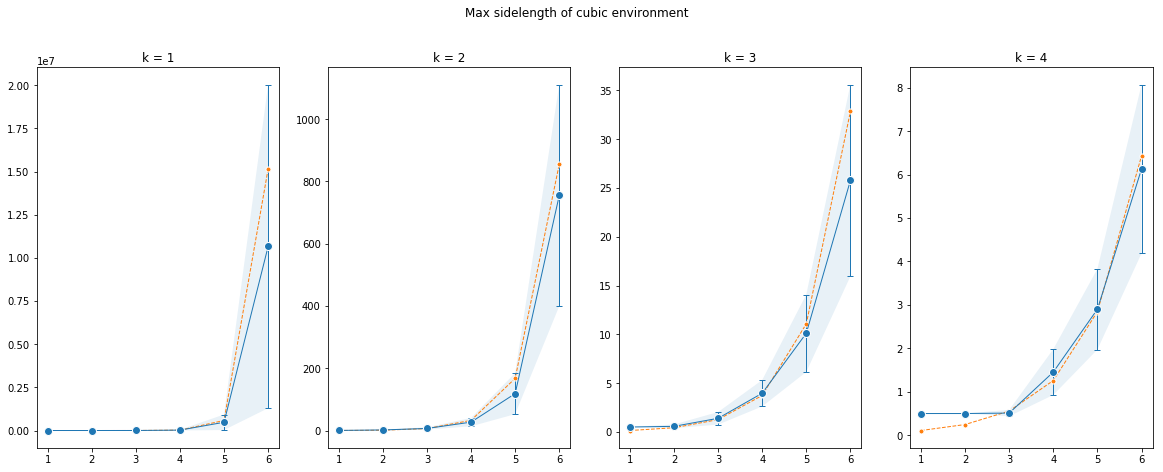

In [30]:

fig, ax = plt.subplots(1, k_max, 
                       figsize=(5*k_max, 7), 
                       sharey=False);
plt.suptitle("Max sidelength of cubic environment", y=1.)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)



for k in ks:
    i = k - 1
    ax[i].set_title("k = {}".format(k))
    ax[i].set_xticks(ms)
#     ax[i].set_yscale("log")
    
    mu = mean_width[:,k-1]
    std = std_width[:,k-1]


    
    ax[i].plot(ms, inferred_width[:, k-1], 
             c="C1", 
             marker=".", 
             markeredgewidth=1,
             markersize=10,
             linestyle="--",
             linewidth=1,
             markeredgecolor="white") 
    
    ax[i].errorbar(ms, mu, std,
                   linewidth=1,
                   marker="o", 
                   markeredgecolor="white",
                   markersize=8,
                   capsize=3)
    
    
    ax[i].fill_between(ms,  mu + std , mu - std, alpha=0.1) 
    

    
    
    
plt.show()

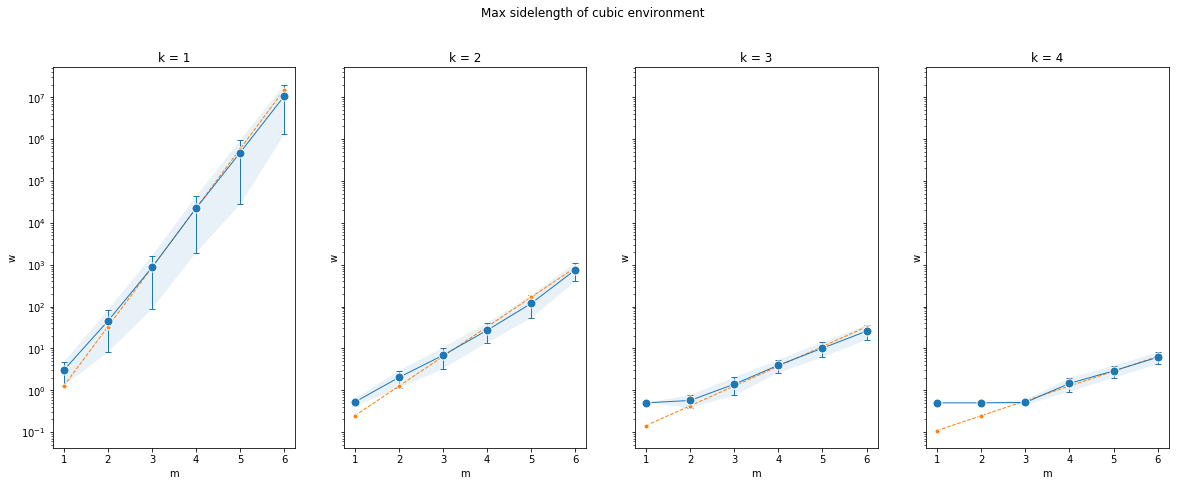

In [31]:

fig, ax = plt.subplots(1, k_max, 
                       figsize=(5*k_max, 7), 
                       sharey=True);
plt.suptitle("Max sidelength of cubic environment", y=1.)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)



for k in ks:
    i = k - 1
    ax[i].set_title("k = {}".format(k))
    ax[i].set_xticks(ms)
    ax[i].set_xlabel("m")
    ax[i].set_ylabel("w")
    ax[i].set_yscale("log")
    
    mu = mean_width[:,k-1]
    std = std_width[:,k-1]
    
    

    
    ax[i].errorbar(ms, mu, std,
                   linewidth=1,
                   marker="o", 
                   markeredgecolor="white",
                   markersize=9,
                   capsize=3)
    
    
    ax[i].fill_between(ms,  mu + std , mu - std, alpha=0.1) 
    
    ax[i].plot(ms, inferred_width[:, k-1], 
             c="C1", 
             marker=".", 
             markeredgewidth=1,
             markersize=10,
             linestyle="--",
             markeredgecolor="white",
             linewidth=1) 
    
    
    
    
plt.show()

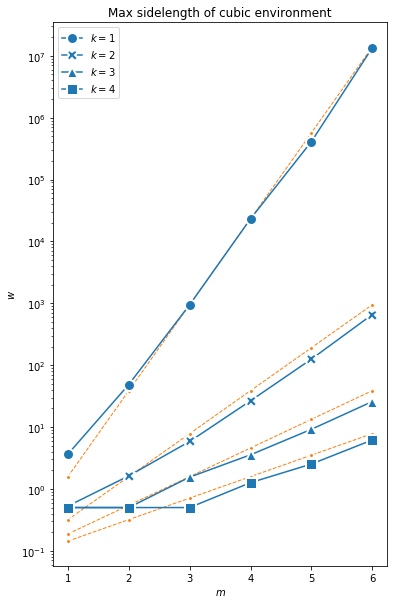

In [19]:
marker = ["o", "X", "^", "s"]


plt.figure(figsize=(6,10))
plt.title("Max sidelength of cubic environment")
plt.yscale("log")
plt.xticks(ms)
plt.xlabel("$m$")
plt.ylabel("$w$")

for k in ks:
    
    plt.plot(ms, inferred_width[:, k-1], 
             c="C1", 
             marker=".", 
             markeredgewidth=2,
             markersize=10,
             linestyle="--",
             linewidth=1,
             markeredgecolor="white") 
    
    mu = mean_width[:,k-1]
    std = std_width[:,k-1]

    plt.plot(ms,mu, 
             marker=marker[k-1], 
             c="C0", 
             markeredgewidth=2,
             markersize=11,
#              linewidth=1 + k*0.4,
             markeredgecolor="white",
             label="$k={}$".format(k))
    
#     plt.fill_between(ms,  mu + std , mu - std, alpha=0.1) 
plt.legend()
plt.show()


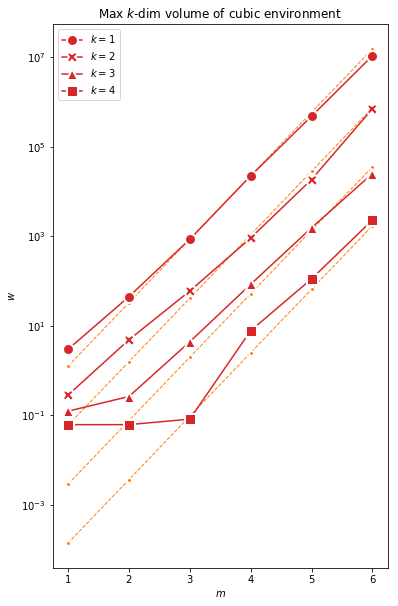

In [34]:
marker = ["o", "X", "^", "s"]


plt.figure(figsize=(6,10))
plt.title("Max $k$-dim volume of cubic environment")
plt.yscale("log")
plt.xticks(ms)
plt.xlabel("$m$")
plt.ylabel("$w$")

for k in ks:
    plt.plot(ms, inferred_vol[:, k-1], 
             c="C1", 
             marker=".", 
             markeredgewidth=2,
             markersize=10,
             linestyle="--",
             linewidth=1,
             markeredgecolor="white") 
    
#     c = "C1" if k ==2 else "C0"
    plt.plot(ms, mean_vol[:, k-1], 
             marker=marker[k-1], 
             c=c, 
             markeredgewidth=2,
             markersize=11,
#              linewidth=1 + k*0.4,
             markeredgecolor="white",
             label="$k={}$".format(k))
plt.legend()
plt.show()


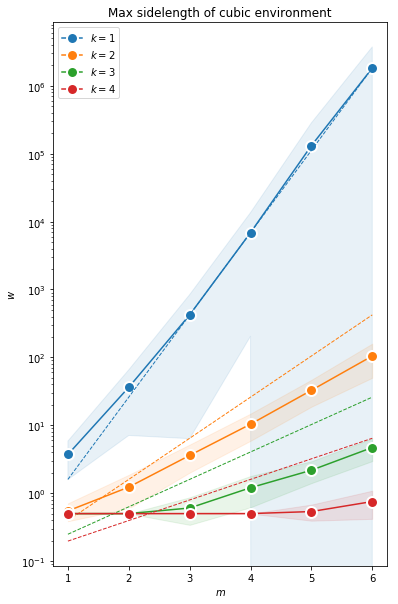

In [9]:
marker = ["o", "X", "^", "s"]


plt.figure(figsize=(6,10))
plt.title("Max sidelength of cubic environment")
plt.yscale("log")
plt.xticks(ms)
plt.xlabel("$m$")
plt.ylabel("$w$")

for k in ks:
    

    
    mu = mean_width[:,k-1]
    std = std_width[:,k-1]
#     c = "C1" if k ==2 else "C0"
    c = "C{}".format(k-1)
    plt.plot(ms,mu, 
#              marker=marker[k-1], 
             marker="o", 
             c=c, 
             markeredgewidth=2,
             markersize=11,
#              linewidth=1 + k*0.4,
             markeredgecolor="white",
             label="$k={}$".format(k))
    
    plt.plot(ms, inferred_width[:, k-1], 
             c=c, 
#              marker=marker[k-1], 
             markeredgewidth=2,
             markersize=10,
             linestyle="--",
             linewidth=1,
             markeredgecolor="white") 
    
    plt.fill_between(ms,  mu + std , mu - std, color=c, alpha=0.1) 
plt.legend()
plt.show()


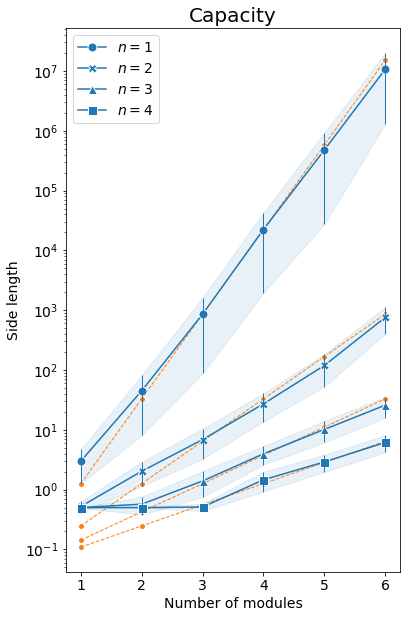

In [53]:
marker = ["o", "X", "^", "s"]

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

plt.figure(figsize=(6,10))
plt.title("Capacity", fontsize=20)
plt.yscale("log")
plt.xticks(ms)
plt.xlabel("Number of modules")
plt.ylabel("Side length")


for k in ks:
    

    
    mu = mean_width[:,k-1]
    std = std_width[:,k-1]


    plt.plot(ms, inferred_width[:, k-1], 
             c="C1", 
             marker=".", 
             markeredgewidth=1,
             markersize=12,
             linestyle="--",
             linewidth=1,
             markeredgecolor="white") 
    
    
    plt.fill_between(ms,  mu + std , mu - std, color="C0", alpha=0.1) 
    plt.errorbar(ms, mu, std, 
                     linestyle="None",
                   c="C0", 
                   linewidth=1,
                   markeredgecolor="white",
                   markersize=9,
                   capsize=0,
#                    label="$k={}$".format(k),
                    zorder=10)
    plt.plot(ms,mu, 
             marker=marker[k-1], 
             c="C0", 
             markeredgewidth=1,
             markersize=9,
#              linewidth=1 + k*0.4,
             markeredgecolor="white",
             label="$n={}$".format(k))
    
plt.legend()
plt.show()


# $k$-dimensional Volume of embedded unit cube

- The volume is computed as $\det(R)$, where $R$ is coming from a $QR$-decomposition of $A$, i.e. $A=QR$, with $Q\in \mathbb{R}^{2m \times k}$ satisfying $Q^TQ = I$.
- Think of the columns of $Q$ as an orthonormal basis of the image of $A$.

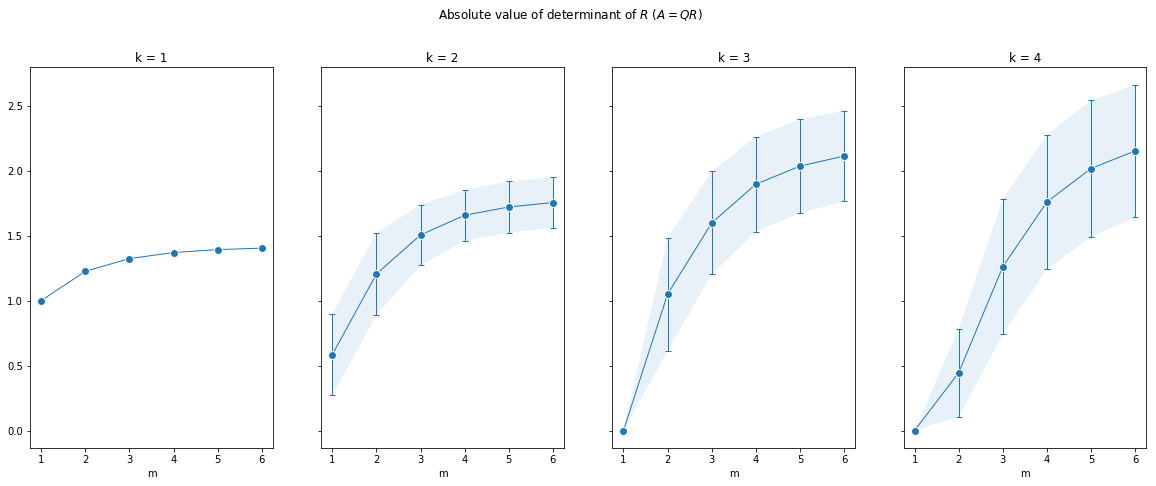

In [11]:

fig, ax = plt.subplots(1, k_max, 
                       figsize=(5*k_max, 7), 
                       sharey=True);
plt.suptitle("Absolute value of determinant of $R$ ($A = QR$)", y=1.)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)



for k in ks:
    i = k - 1
    ax[i].set_title("k = {}".format(k))
    ax[i].set_xticks(ms)
    ax[i].set_xlabel("m")
#     ax[i].set_yscale("log")
    
    mu  = mean_det_R[:,k-1]
    std = std_det_R[:,k-1]
        
    ax[i].errorbar(ms, mu, std,
                   linewidth=1,
                   marker="o", 
                   markeredgecolor="white",
                   markersize=8,
                   capsize=3)
    
    
    ax[i].fill_between(ms,  mu + std , mu - std, alpha=0.1) 
    

    
    
    
plt.show()

# $(2m - k)$-dimensional Volume of fibre orthogonal to embedded cube

- The volume of the normal fibre is computed as $\rho^{2m - k},$ where $\rho$ is the "phase resolution" (here $0.2$)

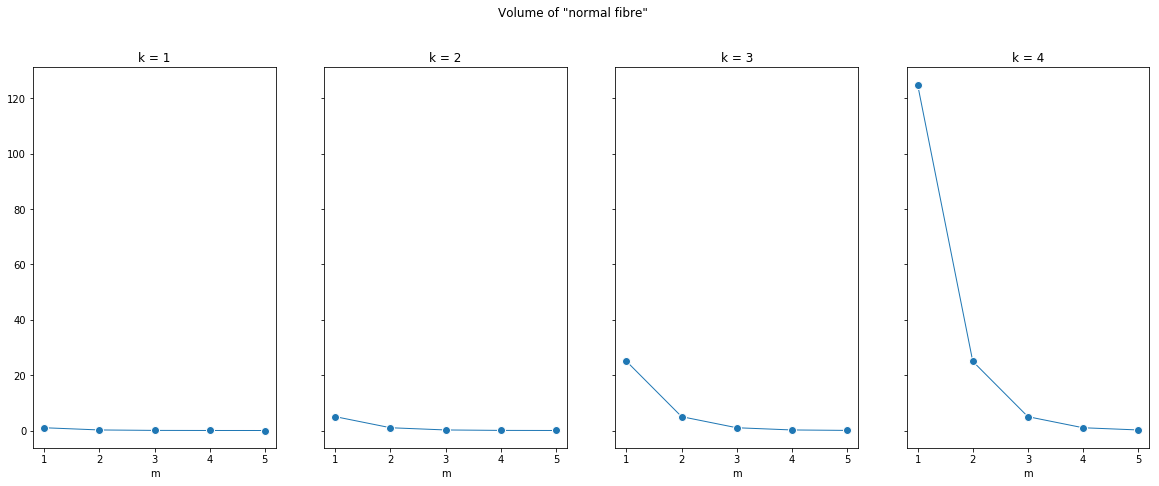

In [12]:

fig, ax = plt.subplots(1, k_max, 
                       figsize=(5*k_max, 7), 
                       sharey=True);
plt.suptitle("Volume of \"normal fibre\"", y=1.)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)


# plt.yscale("log")
for k in ks:
    i = k - 1
    ax[i].set_title("k = {}".format(k))
    ax[i].set_xticks(ms)
    ax[i].set_xlabel("m")

    ax[i].plot(np.arange(1, m_max), phase_resolution**(np.arange(1, m_max) - k),                   
               linewidth=1,
                marker="o", 
                markeredgecolor="white",
                markersize=8)

    

    
    
    
plt.show()

# $m$-dimensional Volume of thickened embedded unit cube

- The volume is computed as $|\det(R)| \cdot \rho^{2m -k }$.

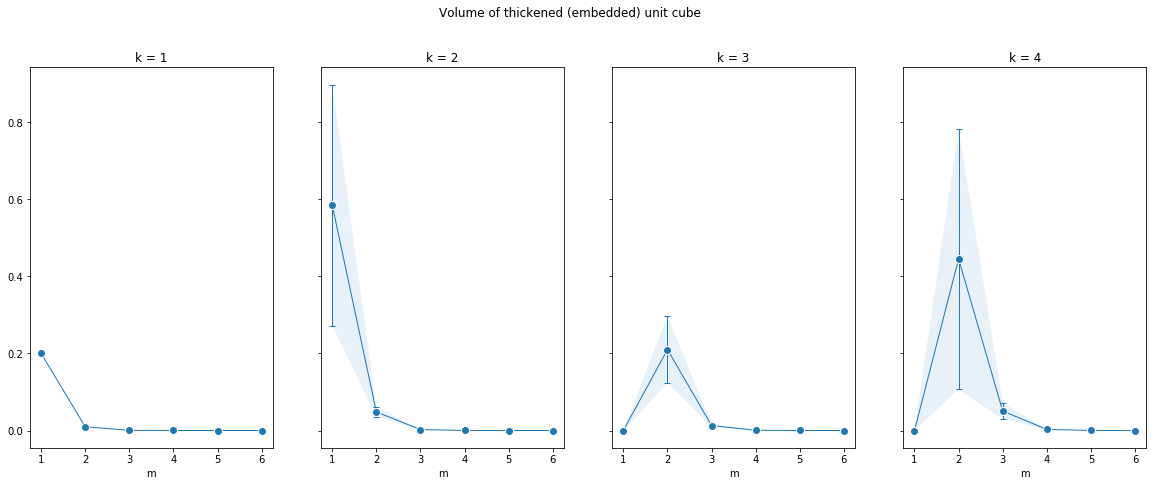

In [13]:

fig, ax = plt.subplots(1, k_max, 
                       figsize=(5*k_max, 7), 
                       sharey=True);
plt.suptitle("Volume of thickened (embedded) unit cube", y=1.)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)



for k in ks:
    i = k - 1
    ax[i].set_title("k = {}".format(k))
    ax[i].set_xticks(ms)
    ax[i].set_xlabel("m")
#     ax[i].set_yscale("log")
    
    mu  = mean_emb_vol[:,k-1]
    std = std_emb_vol[:,k-1]
        
    ax[i].errorbar(ms, mu, std,
                   linewidth=1,
                   marker="o", 
                   markeredgecolor="white",
                   markersize=8,
                   capsize=3)
    
    
    ax[i].fill_between(ms,  mu + std , mu - std, alpha=0.1) 
    

    
    
    
plt.show()

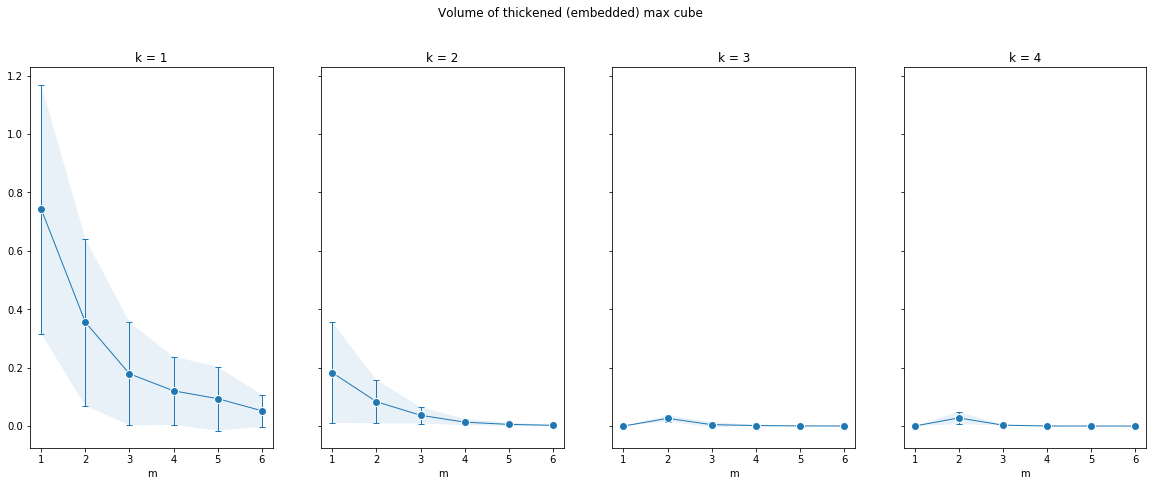

In [14]:

fig, ax = plt.subplots(1, k_max, 
                       figsize=(5*k_max, 7), 
                       sharey=True);
plt.suptitle("Volume of thickened (embedded) max cube", y=1.)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)



for k in ks:
    i = k - 1
    ax[i].set_title("k = {}".format(k))
    ax[i].set_xticks(ms)
    ax[i].set_xlabel("m")
#     ax[i].set_yscale("log")
    
    mu  = np.mean(emb_vol*vol, axis=2)[:,k-1]
    std = np.std(emb_vol*vol, axis=2)[:,k-1]
        
    ax[i].errorbar(ms, mu , std,
                   linewidth=1,
                   marker="o", 
                   markeredgecolor="white",
                   markersize=8,
                   capsize=3)
    
    ax[i].fill_between(ms,  mu + std , mu - std, alpha=0.1) 
    

    

    
    
    
plt.show()

# Capacity in dependence of sidelength

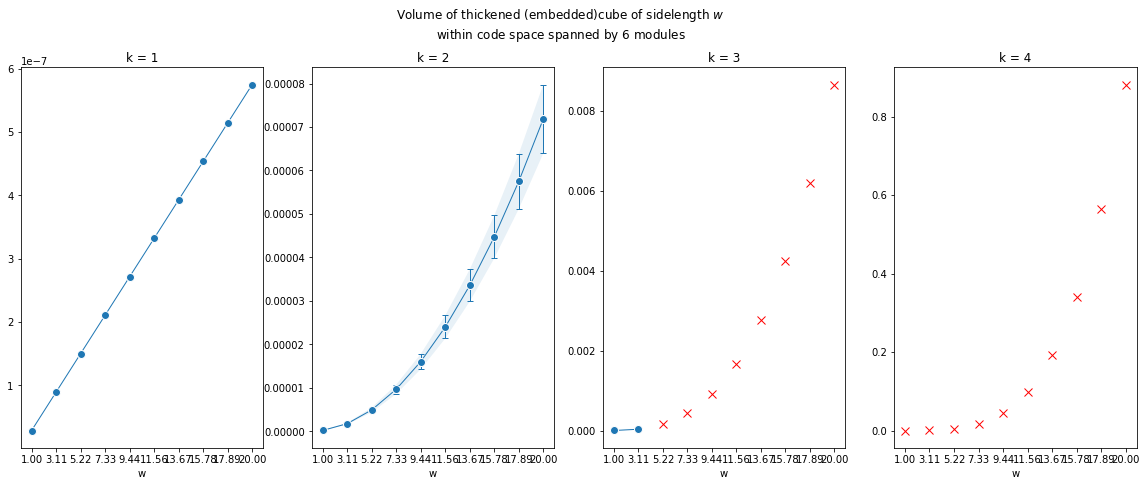

In [15]:

m = 6


fig, ax = plt.subplots(1, k_max, 
                       figsize=(5*k_max, 7), 
                       sharey=False);
plt.suptitle("Volume of thickened (embedded)cube of sidelength $w$ \nwithin code space spanned by ${}$ modules".format(m), y=1.)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)


ws = np.linspace(1., 20., num=10)



for k in ks:
    i = k - 1
    ax[i].set_title("k = {}".format(k))
    ax[i].set_xticks(ws)
    ax[i].set_xlabel("w")
#     ax[i].set_yscale("log")
    
    mu  = mean_emb_vol[m-1,k-1]*ws**k
    std = std_emb_vol[m-1,k-1]*ws**k
    
    
    not_valid = ws > mean_width[m-1,k-1]
    valid = np.invert(not_valid)
    
    ax[i].errorbar(ws[valid], mu[valid] , std[valid],
                   linewidth=1,
                   markeredgecolor="white",
                   markersize=8,
                   capsize=3)
    
    ax[i].fill_between(ws[valid],  (mu + std)[valid] , (mu - std)[valid], alpha=0.1) 
    


    ax[i].plot(ws[valid], mu[valid], 
               linestyle="None", 
               color="C0", 
               marker="o", 
               markeredgecolor="white",
               markersize=8,
               zorder=10)
    
    ax[i].plot(ws[not_valid], mu[not_valid], 
               linewidth=1,
               linestyle="None", 
               color="red", 
               marker="x", 
               markersize=8,
               zorder=10)
    

    
    
plt.show()

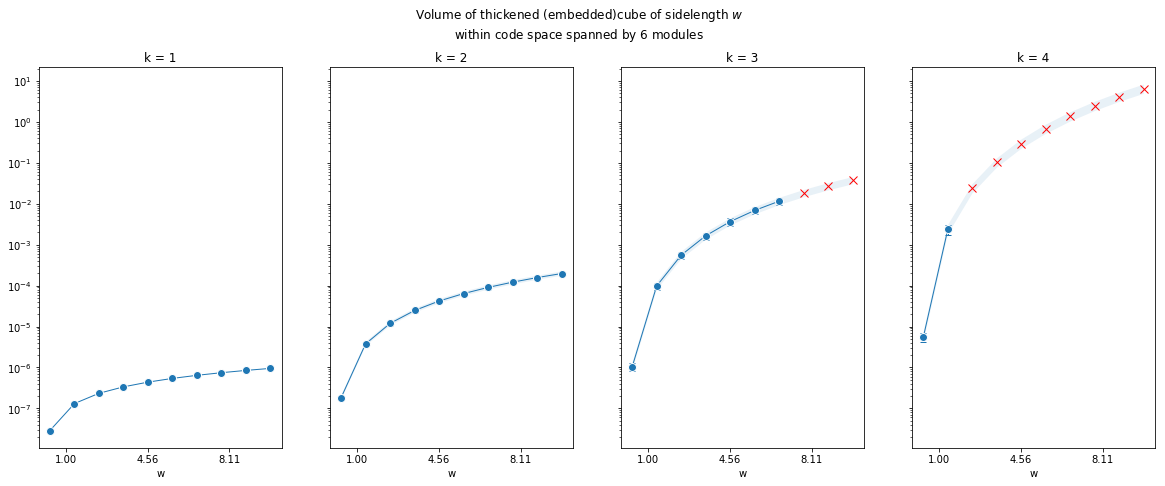

In [84]:

m = 6


fig, ax = plt.subplots(1, k_max, 
                       figsize=(5*k_max, 7), 
                       sharey=True);
plt.suptitle("Volume of thickened (embedded)cube of sidelength $w$ \nwithin code space spanned by ${}$ modules".format(m), y=1.)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)


ws = np.linspace(1., 33., num=10)



for k in ks:
    i = k - 1
    ax[i].set_title("k = {}".format(k))
    ax[i].set_xticks(ws)
    ax[i].set_xlabel("w")
    ax[i].set_yscale("log")
    
    mu  = mean_emb_vol[m-1,k-1]*(ws**k)
    std = std_emb_vol[m-1,k-1]*(ws**k)
    
    
    not_valid = ws > mean_width[m-1,k-1]
    valid = np.invert(not_valid)
    
    ax[i].errorbar(ws[valid]*30./100., mu[valid] , std[valid],
                   linewidth=1,
                   markeredgecolor="white",
                   markersize=8,
                   capsize=3)
    
#     ax[i].fill_between(ws[valid],  (mu + std)[valid] , (mu - std)[valid], alpha=0.1) 
    ax[i].fill_between(ws*30./100.,  (mu + std) , (mu - std), alpha=0.1) 
    

    
    ax[i].plot(ws[valid]*30./100., mu[valid], 
               linestyle="None", 
               color="C0", 
               marker="o", 
               markeredgecolor="white",
               markersize=8,
               zorder=10)
    
    ax[i].plot(ws[not_valid]*30./100., mu[not_valid], 
               linewidth=1,
               linestyle="None", 
               color="red", 
               marker="x", 
               markersize=8,
               zorder=10)
    

    
    
plt.show()

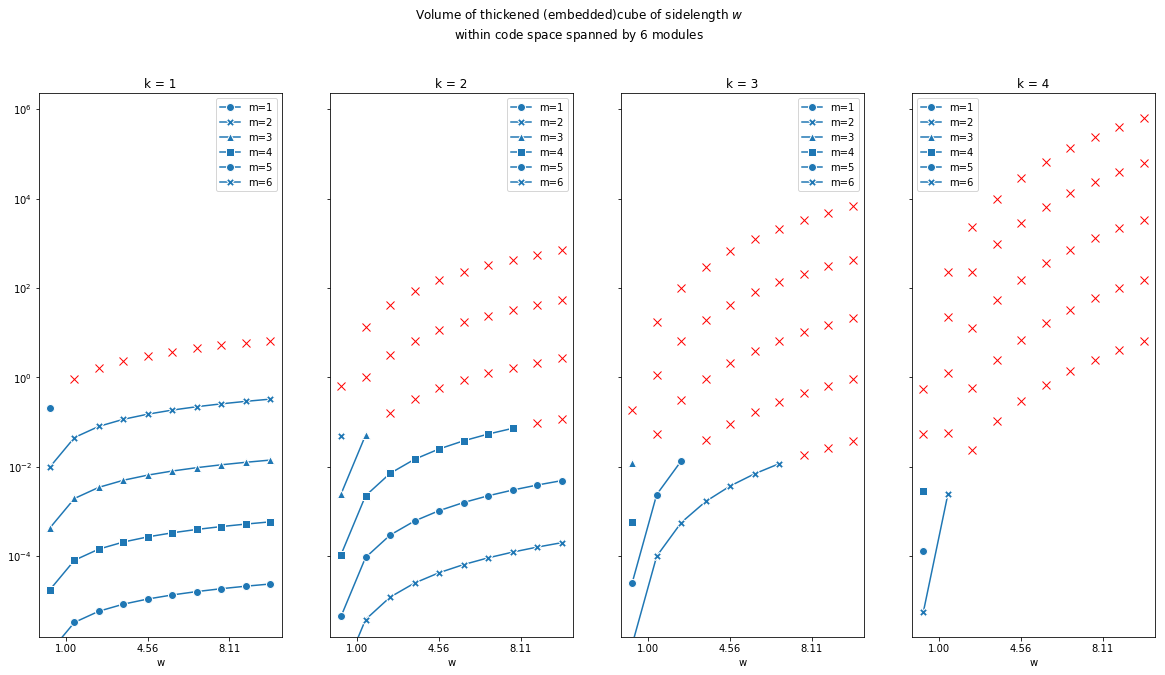

In [29]:

m = 6


fig, ax = plt.subplots(1, k_max, 
                       figsize=(5*k_max, 10), 
                       sharey=True);
plt.suptitle("Volume of thickened (embedded)cube of sidelength $w$ \nwithin code space spanned by ${}$ modules".format(m), y=1.)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)


ws = np.linspace(1., 33., num=10)



for k in ks:
    i = k - 1
    ax[i].set_title("k = {}".format(k))
    ax[i].set_xticks(ws)
    ax[i].set_xlabel("w")
    ax[i].set_yscale("log")
    
    
    
    for m in ms:
        mu  = mean_emb_vol[m-1,k-1]*(ws**k)
        std = std_emb_vol[m-1,k-1]*(ws**k)
    
    
        not_valid = ws > mean_width[m-1,k-1]
        valid = np.invert(not_valid)
    
#         ax[i].errorbar(ws[valid]*30./100., mu[valid] , std[valid],
#                    linewidth=1,
#                    markeredgecolor="white",
#                    markersize=8,
#                    capsize=3)
    
#     ax[i].fill_between(ws[valid],  (mu + std)[valid] , (mu - std)[valid], alpha=0.1) 
#     ax[i].fill_between(ws*30./100.,  (mu + std) , (mu - std), alpha=0.1) 
    


        ax[i].plot(ws[valid]*30./100., mu[valid],  
               color="C0", 
               marker=marker[(m-1)%4], 
               markeredgecolor="white",
               markersize=8,
               zorder=10,
                  label="m={}".format(m))
    
        ax[i].plot(ws[not_valid]*30./100., mu[not_valid], 
               linewidth=1,
               linestyle="None", 
               color="red", 
               marker="x", 
               markersize=8,
               zorder=10)
    

    ax[i].legend()    
    
plt.show()

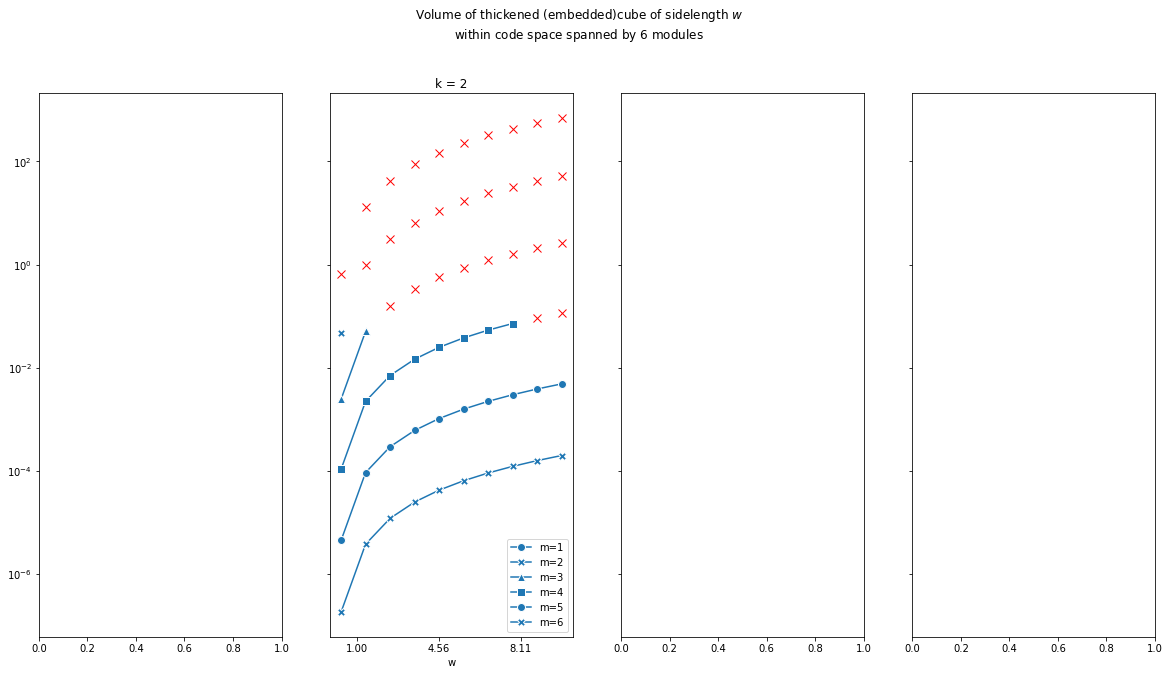

In [36]:

m = 6


fig, ax = plt.subplots(1, k_max, 
                       figsize=(5*k_max, 10), 
                       sharey=True);
plt.suptitle("Volume of thickened (embedded)cube of sidelength $w$ \nwithin code space spanned by ${}$ modules".format(m), y=1.)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)


ws = np.linspace(1., 33., num=10)



for k in [2]:
    i = k - 1
    ax[i].set_title("k = {}".format(k))
    ax[i].set_xticks(ws)
    ax[i].set_xlabel("w")
    ax[i].set_yscale("log")
    
    
    
    for m in ms:
        mu  = mean_emb_vol[m-1,k-1]*(ws**k)
        std = std_emb_vol[m-1,k-1]*(ws**k)
    
    
        not_valid = ws > mean_width[m-1,k-1]
        valid = np.invert(not_valid)
    
#         ax[i].errorbar(ws[valid]*30./100., mu[valid] , std[valid],
#                    linewidth=1,
#                    markeredgecolor="white",
#                    markersize=8,
#                    capsize=3)
    
#     ax[i].fill_between(ws[valid],  (mu + std)[valid] , (mu - std)[valid], alpha=0.1) 
#     ax[i].fill_between(ws*30./100.,  (mu + std) , (mu - std), alpha=0.1) 
    


        ax[i].plot(ws[valid]*30./100., mu[valid],  
               color="C0", 
               marker=marker[(m-1)%4], 
               markeredgecolor="white",
               markersize=8,
               zorder=10,
                  label="m={}".format(m))
    
        ax[i].plot(ws[not_valid]*30./100., mu[not_valid], 
               linewidth=1,
               linestyle="None", 
               color="red", 
               marker="x", 
               markersize=8,
               zorder=10)
    

    ax[i].legend()    
    
plt.show()

99.0


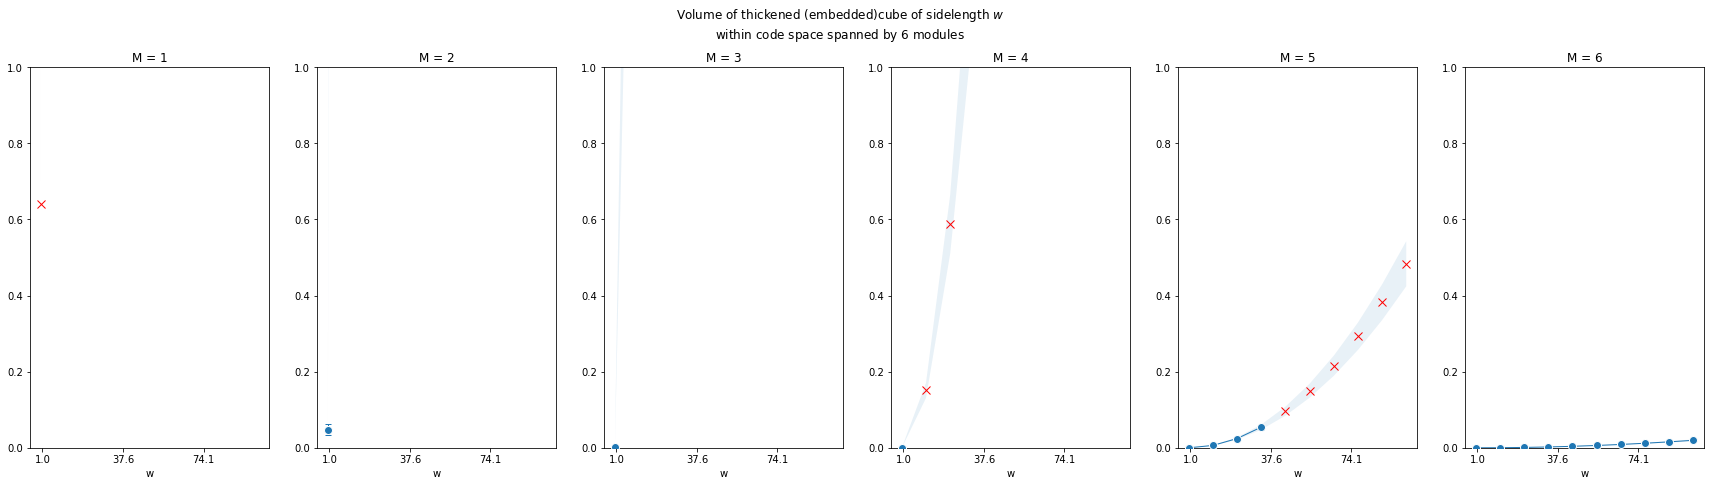

In [82]:




fig, ax = plt.subplots(1, m_max, 
                       figsize=(5*m_max, 7), 
                       sharey=False);
plt.suptitle("Volume of thickened (embedded)cube of sidelength $w$ \nwithin code space spanned by ${}$ modules".format(m), y=1.)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)


ws = np.linspace(1., 330., num=10)

print max(ws)*30./100.
k = 2

for m in ms:
    i = m - 1
    ax[i].set_title("M = {}".format(m))
    ax[i].set_xticks(ws)
    ax[i].set_xlabel("w")
#     ax[i].set_yscale("log")
    ax[i].set_ylim(0.,1.)
    mu  = mean_emb_vol[m-1,k-1]*(ws**k)
    std = std_emb_vol[m-1,k-1]*(ws**k)
    
    
    not_valid = ws > mean_width[m-1,k-1]
    valid = np.invert(not_valid)
    
    ax[i].errorbar(ws[valid]*30./100., mu[valid] , std[valid],
                   linewidth=1,
                   markeredgecolor="white",
                   markersize=8,
                   capsize=3)
    
#     ax[i].fill_between(ws[valid],  (mu + std)[valid] , (mu - std)[valid], alpha=0.1) 
    ax[i].fill_between(ws*30./100.,  (mu + std) , (mu - std), alpha=0.1) 
    

    
    ax[i].plot(ws[valid]*30./100., mu[valid], 
               linestyle="None", 
               color="C0", 
               marker="o", 
               markeredgecolor="white",
               markersize=8,
               zorder=10)
    
    ax[i].plot(ws[not_valid]*30./100., mu[not_valid], 
               linewidth=1,
               linestyle="None", 
               color="red", 
               marker="x", 
               markersize=8,
               zorder=10)
    

    
    
plt.show()

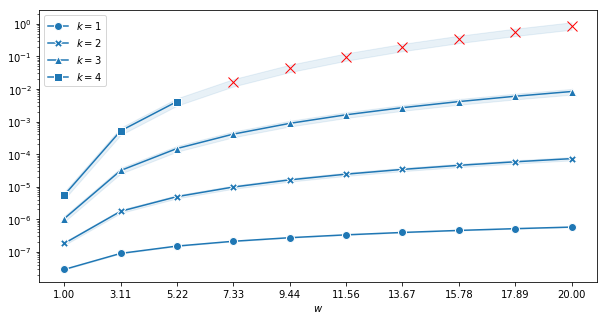

In [63]:
marker = ["o", "X", "^", "s"]




ws = np.linspace(1., 20., num=10)



plt.figure(figsize=(10,5))

plt.yscale("log")
plt.xticks(ws)
plt.xlabel("$w$")




for k in ks:
    

    mu  = mean_emb_vol[m-1,k-1]*(ws**k)
    std = std_emb_vol[m-1,k-1]*(ws**k)
    
    
    not_valid = ws > mean_width[m-1,k-1]
    valid = np.invert(not_valid)
    
    plt.plot(ws[valid],mu[valid], 
             marker=marker[k-1], 
             c="C0", 
             markeredgewidth=1,
             markersize=8,
             markeredgecolor="white",
             label="$k={}$".format(k))
        
    plt.fill_between(ws,  mu + std , mu - std, color="C0", alpha=0.1) 
    
    plt.plot(ws[not_valid], mu[not_valid], 
               linewidth=1,
               linestyle="None", 
               color="red", 
               marker="x", 
               markersize=10,
               zorder=10)
plt.legend()
plt.show()


# Capacity in terms of number of environments

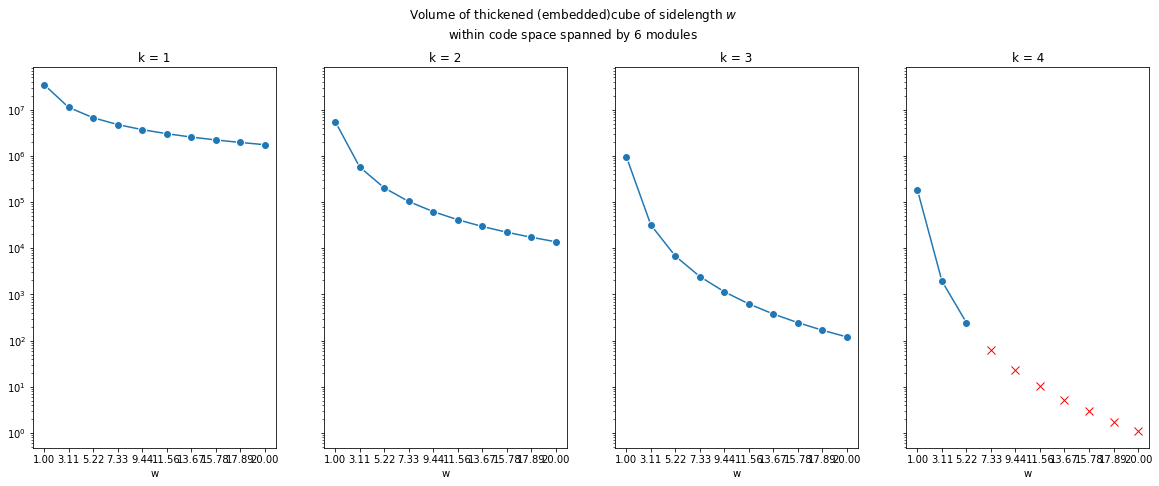

In [279]:

m = 6


fig, ax = plt.subplots(1, k_max, 
                       figsize=(5*k_max, 7), 
                       sharey=True);
plt.suptitle("Volume of thickened (embedded)cube of sidelength $w$ \nwithin code space spanned by ${}$ modules".format(m), y=1.)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)


ws = np.linspace(1., 20., num=10)



for k in ks:
    i = k - 1
    ax[i].set_title("k = {}".format(k))
    ax[i].set_xticks(ws)
    ax[i].set_xlabel("w")
#     ax[i].set_ylim(-10.,100000)
    ax[i].set_yscale("log")
    
    
    mu  = 1./(mean_emb_vol[m-1,k-1]*ws**k)
    

    not_valid = ws > mean_width[m-1,k-1]
    valid = np.invert(not_valid)
    

    
    ax[i].plot(ws[valid], mu[valid], 
               linestyle="-", 
               color="C0", 
               marker="o", 
               markeredgecolor="white",
               markersize=8,
               zorder=10)
    
    ax[i].plot(ws[not_valid], mu[not_valid], 
               linewidth=1,
               linestyle="None", 
               color="red", 
               marker="x", 
               markersize=8,
               zorder=10)
    

    
    
plt.show()